# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *


In [2]:
%load_ext autoreload
%autoreload 2

# Dataset

In [4]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [24]:
single_layer=read_pickle(folder.stored.file('single'))
three_layers=read_pickle(folder.stored.file('three'))
three_layers_no_batch=read_pickle(folder.stored.file('three_layers_no_batch'))
three_layers_1cnn=read_pickle(folder.stored.file('three_layers_1cnn'))

# Plot

In [25]:
dropout_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [26]:
def get_performance(results):
    performance_train=[]
    performance_validation=[]
    performance_test=[]
    for result in results:
        result.compute_errors()
        performance_train.append(result._experiments[-1].performance_train)
        performance_validation.append(result._experiments[-1].performance_validation)
        performance_test.append(result._experiments[-1].performance_test)
        
    return performance_train,performance_validation,performance_test

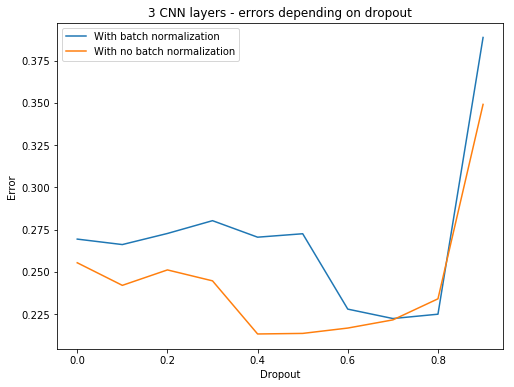

In [31]:
plt.figure(figsize=(8,6))

errors_train,errors_validation,errors_test=get_performance(three_layers)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_test,label='With batch normalization')

errors_train,errors_validation,errors_test=get_performance(three_layers_1cnn)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_test,label='With no batch normalization')
plt.title('3 CNN layers - errors depending on dropout')
plt.xlabel('Dropout')
plt.ylabel('Error')
plt.legend()

plt.show()

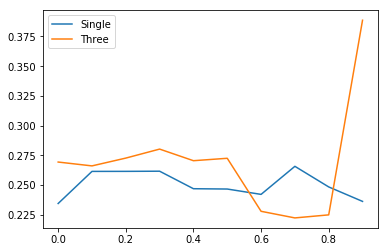

In [16]:
errors_train,errors_validation,errors_test=get_performance(single_layer)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_test,label='Single')

errors_train,errors_validation,errors_test=get_performance(three_layers)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_test,label='Three')

plt.legend()

plt.show()

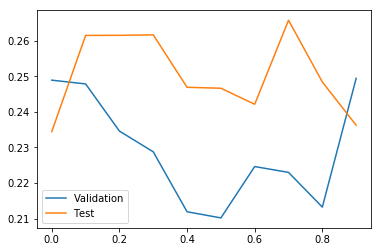

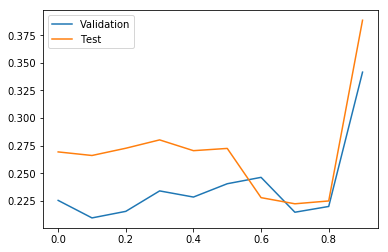

In [17]:
errors_train,errors_validation,errors_test=get_performance(single_layer)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_validation,label='Validation')
plt.plot(dropout_values,errors_test,label='Test')
plt.legend()

plt.show()

errors_train,errors_validation,errors_test=get_performance(three_layers)
# plt.plot(dropout_values,errors_train)
# plt.plot(dropout_values,errors_train)
plt.plot(dropout_values,errors_validation,label='Validation')
plt.plot(dropout_values,errors_test,label='Test')

plt.legend()

plt.show()

